# Exercício 3

Dada a barra a esforço axial com secção constante $(b \times h)$ engastada e livre com uma carga distribuída dada por $q$ pede-se calcular o deslocamento em sua extremidade livre utilizando o MEF com aproximações linear e quadrática utilizando, respectivamente, 1 elemento e 5 elementos. Apresente a dedução da matriz do elemento quadrático para este caso. Na solução numérica indique claramente a numeração dos nós e dos elementos utilizados em sua discretização e apresentando a numeração dos nós e dos elementos utilizados em sua discretização e apresentado a matriz global e o campo de deslocamento aproximado comparado com a solução exata do problema.
Dados:

* $b = 0,10m$
* $E = 10^8 \cdot T (Pa)$
* $h = 0,5 \cdot T (m)$
* $q(x) = 10 \cdot T (kN/m)$
* $l = 10 \cdot T (m)$

Com $T = \frac{20 - N}{19}$

## Resolução

### Substituindo $N$

Inicialmente, substituiremos os valores de $N$ e $T$:

$$
N = 0 \Rightarrow T = \frac{20}{19}
$$

Logo, temos que:

* $b = 0,10m$
* $E = 10^8 \cdot \frac{20}{19} (Pa)$
* $h = 0,5 \cdot \frac{20}{19} (m)$
* $q(x) = 10 \cdot \frac{20}{19} (kN/m)$
* $l = 10 \cdot \frac{20}{19} (m)$

### Equação do problema

$$
-EA \frac{\partial ^2 u(x)}{\partial x^2} = q(x)
$$

Onde $0 < x < L$, $A = bh$ é a área transversal e $u$ é o vetor deslocamento.

### Malhas dos elementos e nós

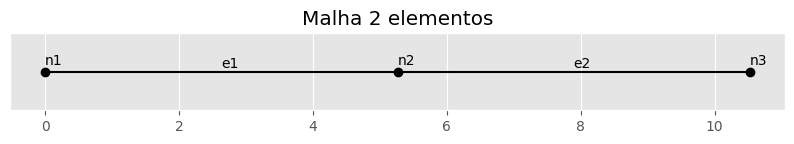

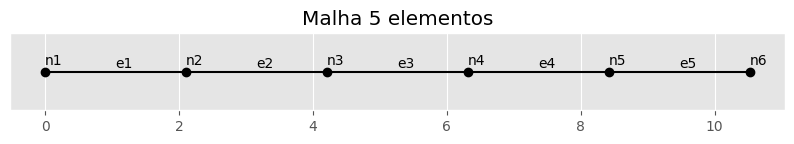

In [7]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
L=200/19
for n in [2, 5]:
    plt.figure(figsize=(10,1))
    plt.plot([i*L/n for i in range(n+1)],
            [0 for i in range(n+1)],
            '-o',
            color='black'
    )
    for i in range(n):
        plt.annotate(f'n{i+1}', (i*L/n,0.01))
        plt.annotate(f'e{i+1}', (i*L/n + (L/n)/2,0.005))
    plt.annotate(f'n{n+1}', (L, 0.01))
    plt.gca().get_yaxis().set_visible(False)
    plt.title(f'Malha {n} elementos')
    plt.show()

### Condições de Contorno

Do enunciado, temos que a barra possui uma extremidade engastada e outra livre, portanto:

$$
u(0) = 0
$$



### Aproximação Linear (1 elemento)

Fazendo uma aproximação linear, temos:

$u = u_1 \phi _1 + u_2 \phi _2$

Sendo as funções bases de Lagrange:

$$
\phi _1 = 1 - \frac{x}{h}
$$

$$
\phi _2 = \frac{x}{h}
$$

**Calculando Matriz de Rigidez para cada elemento**

$$
K^i = EA
\begin{bmatrix}
\int_0^h \phi_1' \phi_1' dx & \int_0^h \phi_1' \phi_2' dx\\
\int_0^h \phi_2' \phi_1' dx & \int_0^h \phi_2' \phi_2' dx
\end{bmatrix}
$$

In [36]:
import sympy as sp

E, A, q, x, h = sp.symbols('E A q x h')

phi_1 = 1 - x/h
phi_2 = x/h

integral_1 = sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h))
integral_2 = sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))
integral_3 = sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h))
integral_4 = sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))

K = E * A * sp.Matrix([[integral_1, integral_2], [integral_3, integral_4]])
display((E * A) / h, sp.Matrix([[integral_1, integral_2], [integral_3, integral_4]]).subs({h: 1}))

A*E/h

Matrix([
[ 1, -1],
[-1,  1]])

**Calculando Vetor Fonte por elemento**

$$
f^i =
\begin{bmatrix}
\int_0^h \phi_1 q(x) dx \\
\int_0^h \phi_2 q(x) dx
\end{bmatrix}
$$

In [37]:
f = sp.symbols('f')

f = sp.Matrix([[sp.integrate(phi_1 * q, (x, 0, h))], [sp.integrate(phi_2 * q, (x, 0, h))]])

display(f)

Matrix([
[h*q/2],
[h*q/2]])

**Substituição dos valores**

Para o caso linear, como temos apenas 1 elemento, a Matriz Global de Rigidez e o Vetor Fonte Global serão os mesmos já calculados:

In [38]:
T = 20/19
L = 10 * T
n_elementos = 1

K_lin = K.subs({
    A: 0.1 * 0.5 * T,
    E: (10**8) * T,
    h: L/n_elementos
})

display(K_lin)

Matrix([
[ 526315.789473684, -526315.789473684],
[-526315.789473684,  526315.789473684]])

In [39]:
f_lin = f.subs({
    h: L/n_elementos,
    q: 10 * T
})
display(f_lin)

Matrix([
[55.4016620498615],
[55.4016620498615]])

**Aplicando Condições de Contorno de Dirichlet ($u(0) = 0$)**

Conhecendo o valor em $u(0)$, podemos utilizar o método de eliminação:

In [40]:
K_lin[0, 0] = 1.0
K_lin[0, 1] = 0.0
K_lin[1, 0] = 0.0
f_lin[0]    = 0.0

**Calculando Vetor de Deslocamentos $u$**

In [41]:
u_lin = K_lin.inv() * f_lin
display(u_lin)

Matrix([
[                   0],
[0.000105263157894737]])

### Aproximação Quadrática (5 elementos)

Fazendo uma aproximação quadrática, temos que:

$$
u = u_1 \phi _1 + u_2 \phi _2 + u_3 \phi _3
$$

Sendo as funções bases de Lagrange para este caso:

$$
\phi _1 = 1 - \frac{3x}{h} + \frac{2x^2}{h^2}
$$

$$
\phi _2 = \frac{4x}{h} - \frac{4x^2}{h^2}
$$

$$
\phi _3 = -\frac{x}{h} + \frac{2x^2}{h^2}
$$

**Calculando Matriz de Rigidez para cada elemento**

$$
K^i = EA
\begin{bmatrix}
\int_0^h \phi_1' \phi_1' dx & \int_0^h \phi_1' \phi_2' dx & \int_0^h \phi_1' \phi_3' dx \\
\int_0^h \phi_2' \phi_1' dx & \int_0^h \phi_2' \phi_2' dx & \int_0^h \phi_2' \phi_3' dx \\
\int_0^h \phi_2' \phi_1' dx & \int_0^h \phi_3' \phi_2' dx & \int_0^h \phi_3' \phi_3' dx 
\end{bmatrix}
$$

In [42]:
E, A, q, x, h = sp.symbols('E A q x h')

phi_1 = 1 - 3*x/h + 2*(x**2)/(h**2)
phi_2 = 4*x/h - 4*(x**2)/(h**2)
phi_3 = -x/h + 2 * (x**2)/(h**2)

integral_1 = sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_1, x), (x, 0, h))
integral_2 = sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_2, x), (x, 0, h))
integral_3 = sp.integrate(sp.diff(phi_1, x) * sp.diff(phi_3, x), (x, 0, h))

integral_4 = sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_1, x), (x, 0, h))
integral_5 = sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_2, x), (x, 0, h))
integral_6 = sp.integrate(sp.diff(phi_2, x) * sp.diff(phi_3, x), (x, 0, h))

integral_7 = sp.integrate(sp.diff(phi_3, x) * sp.diff(phi_1, x), (x, 0, h))
integral_8 = sp.integrate(sp.diff(phi_3, x) * sp.diff(phi_2, x), (x, 0, h))
integral_9 = sp.integrate(sp.diff(phi_3, x) * sp.diff(phi_3, x), (x, 0, h))

K_ = E * A * sp.Matrix([
    [integral_1, integral_2, integral_3], 
    [integral_4, integral_5, integral_6],
    [integral_7, integral_8, integral_9]
])
display(E*A/h, K_.subs({E: 1, A: 1, h: 1}))

A*E/h

Matrix([
[ 7/3, -8/3,  1/3],
[-8/3, 16/3, -8/3],
[ 1/3, -8/3,  7/3]])

**Calculando Matriz de Rigidez Global**

Para aproximações quadráticas e considerando que serão utilizados 5 elementos, temos que a matriz de rigidez global $K$ será dada por:

$$
K =
\begin{bmatrix}
K^1_{11}        & K^1_{12}          & K^1_{13}          & 0             & 0                 & \cdots & 0                    & 0         & 0\\
K^1_{21}        & K^1_{22}          & K^1_{23}          & 0             & 0                 & \cdots & 0                    & 0         & 0\\
K^1_{31}        & K^1_{32}          & K^1_{33}+K^2_{11} & K^2_{12}      & K^2_{13}          & \cdots & 0                    & 0         & 0\\
0               & 0                 & K^2_{21}          & K^2_{22}      & K^2_{23}          & \cdots & 0                    & 0         & 0\\
0               & 0                 & K^2_{31}          & K^2_{32}      & K^2_{33}+K^3_{11} & \cdots & 0                    & 0         & 0\\
\vdots          & \vdots            & \vdots            & \vdots        & \vdots            & \ddots & \vdots               & \vdots    & \vdots\\
0               & 0                 & 0                 & 0             & 0                 & \cdots & K^4_{33}+K^5_{11}    & K^5_{12}  & K^5_{13} \\
0               & 0                 & 0                 & 0             & 0                 & \cdots & K^5_{21}             & K^5_{22}  & K^5_{23} \\
0               & 0                 & 0                 & 0             & 0                 & \cdots & K^5_{31}             & K^5_{32}  & K^5_{33} 
\end{bmatrix}
$$

In [43]:
n_elements = 5

def round_expr(expr, num_digits):
    ## funcao para truncar valores
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})

K_G = sp.zeros(n_elements*2 + 1)

for i in range(n_elements):
    first = i * 2
    last  = i * 2 + 3 
    K_G[first:last, first:last] += K_

display(E*A, round_expr(K_G.subs({h: L/5, A: 1, E: 1}), 3))

A*E

Matrix([
[ 1.108, -1.267,  0.158,      0,      0,      0,      0,      0,      0,      0,      0],
[-1.267,  2.533, -1.267,      0,      0,      0,      0,      0,      0,      0,      0],
[ 0.158, -1.267,  2.217, -1.267,  0.158,      0,      0,      0,      0,      0,      0],
[     0,      0, -1.267,  2.533, -1.267,      0,      0,      0,      0,      0,      0],
[     0,      0,  0.158, -1.267,  2.217, -1.267,  0.158,      0,      0,      0,      0],
[     0,      0,      0,      0, -1.267,  2.533, -1.267,      0,      0,      0,      0],
[     0,      0,      0,      0,  0.158, -1.267,  2.217, -1.267,  0.158,      0,      0],
[     0,      0,      0,      0,      0,      0, -1.267,  2.533, -1.267,      0,      0],
[     0,      0,      0,      0,      0,      0,  0.158, -1.267,  2.217, -1.267,  0.158],
[     0,      0,      0,      0,      0,      0,      0,      0, -1.267,  2.533, -1.267],
[     0,      0,      0,      0,      0,      0,      0,      0,  0.158, -1.267,  1.108]])

**Calculando Vetor Fonte para cada elemento**

Temos que:

$$
f^i =
\begin{bmatrix}
\int_0^h \phi_1 q(x) dx \\
\int_0^h \phi_2 q(x) dx \\
\int_0^h \phi_3 q(x) dx
\end{bmatrix}
$$

In [44]:
f_ = sp.symbols('f')

f_ = sp.Matrix([[sp.integrate(phi_1 * q, (x, 0, h))], [sp.integrate(phi_2 * q, (x, 0, h))], [sp.integrate(phi_3 * q, (x, 0, h))]])

display(f_)

Matrix([
[  h*q/6],
[2*h*q/3],
[  h*q/6]])

In [45]:
F = sp.zeros(n_elements * 2 + 1, 1)

for i in range(n_elements):
    first = i * 2
    last  = i * 2 + 3 
    F[first:last, 0] += f_

display(F)

Matrix([
[  h*q/6],
[2*h*q/3],
[  h*q/3],
[2*h*q/3],
[  h*q/3],
[2*h*q/3],
[  h*q/3],
[2*h*q/3],
[  h*q/3],
[2*h*q/3],
[  h*q/6]])

**Aplicando Condições de Contorno**

In [46]:
for i in range(n_elements * 2 + 1):
    K_G[0, i] = 0.0
    K_G[i, 0] = 0.0
K_G[0, 0] = 1.0
F[0]      = 0.0

**Substituindo os valores**

In [47]:
K_qua = K_G.subs({
    A: 0.1 * 0.5 * T,
    E: (10**8) * T,
    h: L/n_elements
})

f_qua = F.subs({
    h: L/n_elements,
    q: 10 * T
})

**Calculando Matriz de Deslocamentos**

In [48]:
u_qua = K_qua.inv() * f_qua
display(u_qua)

Matrix([
[                   0],
[ 1.99999999999998e-5],
[  3.7894736842105e-5],
[ 5.36842105263153e-5],
[  6.7368421052631e-5],
[ 7.89473684210519e-5],
[ 8.84210526315781e-5],
[ 9.57894736842097e-5],
[0.000101052631578946],
[0.000104210526315789],
[0.000105263157894736]])

In [ ]:
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
plt.figure(figsize=(10,2))
plt.plot([i*L/2 for i in range(3)],
         [0 for i in range(3)],
         '-o',
         color='black'
)
for i in range(2):
    plt.annotate(f'n{i+1}', (i*L/2,0.01))
    plt.annotate(f'e{i+1}', (i*L/2 + L/4,0.005))
plt.annotate('n3', (L, 0.01))
plt.show()

### Resultados

In [49]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

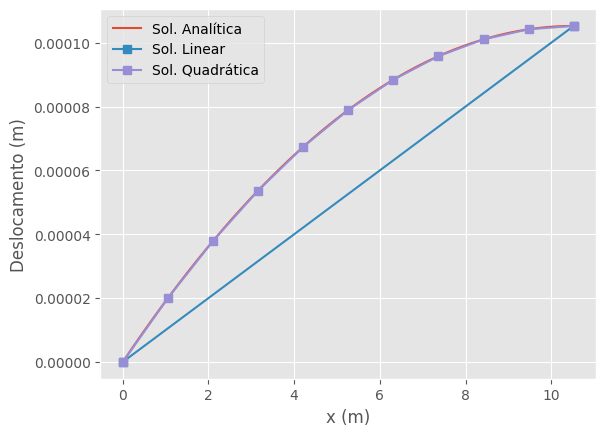

In [50]:
# funcoes

def sol_analitica(x, E, A, q, c1, c2):
    return -(1/(E*A)) * ((q * x**2/2) + c1 * x + c2)

L = 10 * T
E = (10 ** 8) * T
A = 0.1 * 0.5 * T
q = 10 * T

c1 = -1 * q * L
c2 = 0

# dominio
x_analitica = np.linspace(0, L)
y_analitica = sol_analitica(x_analitica, E, A, q, c1, c2)


# resultados
plt.plot(x_analitica, y_analitica, label='Sol. Analítica')
plt.plot([i*L for i in range(2)], u_lin, '-s', label='Sol. Linear')
plt.plot([i*L/10 for i in range(11)], u_qua, '-s', label='Sol. Quadrática')

plt.xlabel('x (m)')
plt.ylabel('Deslocamento (m)')
plt.legend()
plt.show()